# Candidate Light Curves

In [1]:
import pickle
import sncosmo
import numpy as np
import lsst.daf.base as dafBase
import lsst.daf.persistence as dafPersist

import re

import lsst.afw.display.ds9 as ds9

import matplotlib.pyplot as plt
%matplotlib inline

/renoir_data_00/fouchez/lsst/DM/stacks/lsstsw/2016-04-04/lsstsw/miniconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
def source_distance(src1, src2):
    ra, dec = src1['ra'], src1['dec']
    ra2, dec2 = src2['ra'], src2['dec']
            
    return np.sqrt((float(ra)-float(ra2))**2+(float(dec)-float(dec2))**2)/3.14159*180*3600

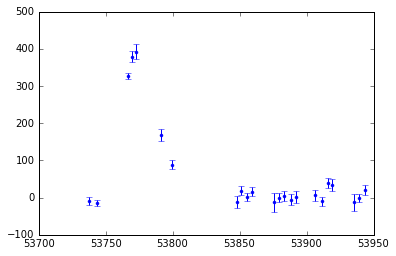

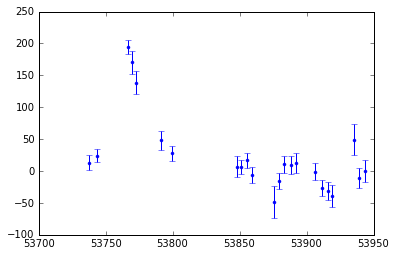

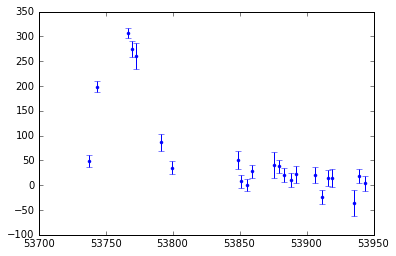

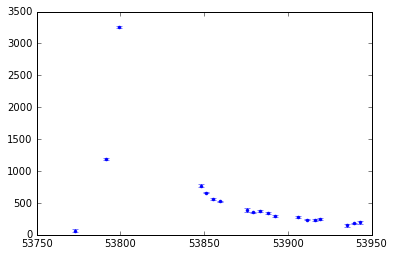

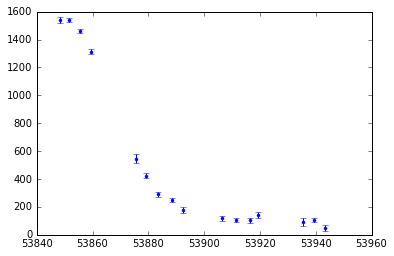

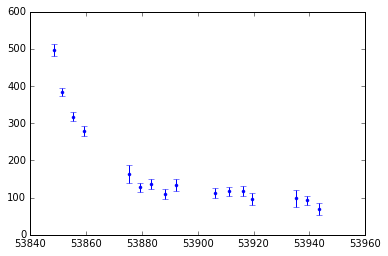

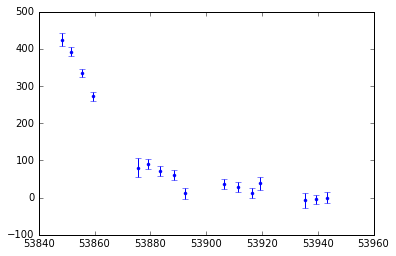

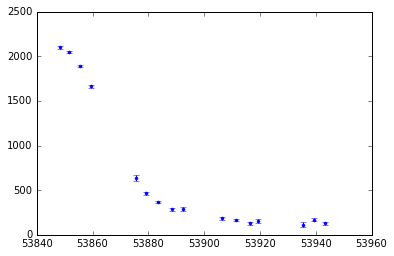

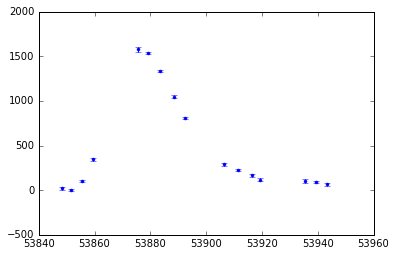

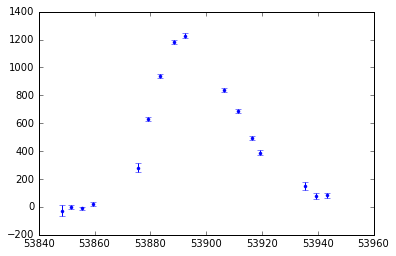

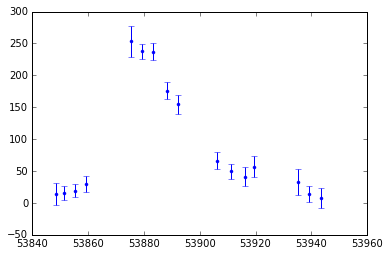

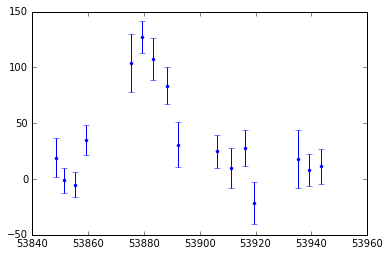

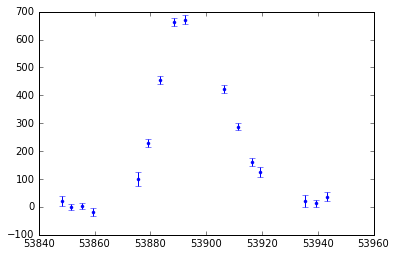

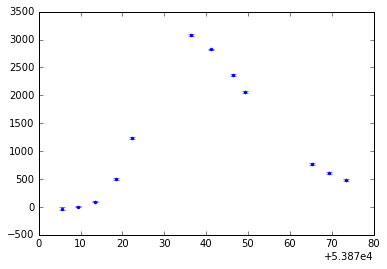

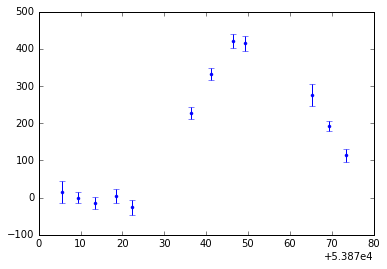

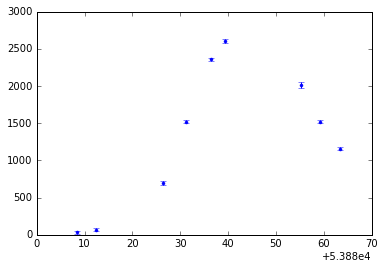

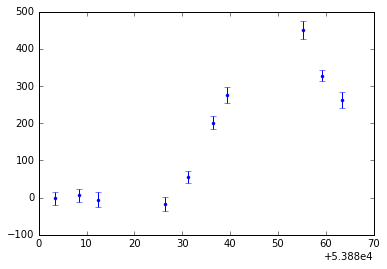

In [36]:
snls_transients = pickle.load(open('/renoir_data_02/jpreyes/lsst_data/transients_files/snls_transients_filter_r.lc', 'rb'))

for snls_lc in snls_transients:

    
    
    plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
    plt.show()

In [5]:
candidates_filter_r = pickle.load(open('/renoir_data_02/jpreyes/lsst_data/transients_files/transients_filter_r.lc', 'rb'))
candidates_filter_i = pickle.load(open('/renoir_data_02/jpreyes/lsst_data/transients_files/transients.lc', 'rb'))



In [6]:
len(candidates_filter_r), len(candidates_filter_i)

(1148, 8639)

In [37]:
snls_transients[-1]['ra']

3.73960310551
3.73960310551
3.73960310551
3.73960310551
3.73960310551
3.73960310551
3.73960310551
3.73960310551
3.73960310551
3.73960310551


In [38]:
candidates_filter_r[-1]['ra'][-1]

3.75378 rad

In [44]:
matches = []
for c_r in candidates_filter_r:
  
    
    
    for c_i in candidates_filter_i:
        #print lc[0]['ra']
        #print lc[0]['dec']
        if source_distance({'ra':c_r['ra'][0], 'dec':c_r['ra'][0]},{'ra':c_i['ra'][0], 'dec':c_i['ra'][0]}) < 1:
           
            matches.append((c_r, c_i))
            break

In [45]:
len(matches)

985

<Container object of 3 artists>

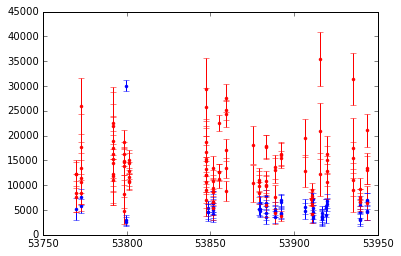

In [46]:
n = 100
lc = matches[n][0]


plt.errorbar(lc['mjd'], lc['flux'], yerr=lc['flux_error'], fmt='.', color='blue')

lc = matches[n][-1]

plt.errorbar(lc['mjd'], lc['flux'], yerr=lc['flux_error'], fmt='.', color='red')
